In [1]:
###################################################################################
# Course : Data Preparation
# Course code: DSC540
# Weeks: 9 and 10
# Script name : DSC540_Shekhar_Week9&10.ipynb
# Created Date : May 1st 2023
# Created By : Manish Shekhar
###################################################################################

# Activity 9 - Extract top 100 ebooks from Gutenberg

### 1. Import the needed libraries

In [3]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import re
import ssl

### 2. Check SSL certificate

In [4]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### 3. Read the HTML from the url

In [5]:
# Read the HTML from url and pass onto BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top.php'

In [6]:
response = requests.get(top100url)

### 4. Write small function to check the status of the request

In [7]:
def status_check(r):
    if r.status_code==200:
        print("Success!!")
        return 1
    else:
        print("Failed!!")
        return -1
    

### 5. Check the status of the response

In [8]:
status_check(response)

Success!!


1

### 6. Decode the response and pass it onto BeautifulSoup for HTML parsing

In [9]:
contents = response.content.decode(response.encoding)

In [10]:
soup = BeautifulSoup(contents, 'html.parser')

### 7. Find all href tags and store them in the list of links

In [11]:
# check what the list looks like and print first 30 elements
# Empty list to all the http links in the html page
lst_links = []

# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    # print(link.get('href'))
    lst_links.append(link.get('href'))

### 8. Print the 30 from the list of links

In [12]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### 9. Use the regular expression to find the numeric digits in these links. These are the file numbers for the top 100 books. 

In [13]:
# initialize the empty list to hold the file numbers
booknum = []

### 10. Number 19 to 118 is the original list of links have the top 100 ebooks' numbers. Loop over the appropriate range and use the regex to find the numeric digits in the link (href) string. 

In [14]:
# Use the find_all() method
for i in range (19, 119):
    link=lst_links[i]
    link=link.strip()
    # regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+', link)
    if len(n)==1:
        # Append the file number casted as integer
        booknum.append(int(n[0]))

### 11. Print the file numbers

In [15]:
print("\n The file numbers for top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(sorted(set(booknum)))


 The file numbers for top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 7, 11, 16, 30, 36, 43, 45, 46, 55, 74, 76, 84, 98, 100, 120, 145, 158, 174, 205, 219, 345, 394, 408, 768, 844, 996, 1080, 1184, 1232, 1259, 1260, 1342, 1400, 1497, 1513, 1661, 1727, 1952, 1998, 2160, 2500, 2542, 2554, 2591, 2600, 2641, 2680, 2701, 2814, 2852, 3206, 3207, 4085, 4300, 4363, 5197, 5200, 5740, 6130, 6593, 6761, 8800, 10007, 10676, 15845, 16389, 20228, 20847, 23042, 25344, 27827, 28054, 30254, 35899, 37106, 42108, 47629, 58585, 64317, 67098, 67979, 70675, 70677, 70678, 70680, 70681, 70683, 70684]


### 12. What does the suip object's text look like? Use .text method and print only firat 2000 characters

In [16]:
# notice a lot of empty spaces/blanks. We will ignore them as they are part of html page's markup and it's whimsical nature
print(soup.text[:2000])

#if (top != self):
#    top.location.replace('http://www.gutenberg.org')
#    alert('Project Gutenberg is the FREE service with no membership required. If you paid somebody to get here, make them pay your money back!')





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-01292268
last 7 days1887869
last 30 days7613506



Top 100 EBooks yesterday
T

### 13. Search the extracted text (using regular expression) from the suip object to find the names of top 100 ebooks (yesterday's rank) 

In [60]:
# Temp empty list of ebook names
lst_titles_temp = []

### 14. create a starting index. It should point to the Top 100 Ebooks Yesterday. Use the splilines method of the soup.text

In [61]:
# It splits the lines of the text of the suip object
start_idx = soup.text.splitlines().index('Top 100 EBooks yesterday')
print(start_idx)

# print(soup.text.splitlines()[113])

113


### 15. Loop 1-100 to add the list of the strings of the next 100 lines to this temporary list. Use splilines() method

In [62]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [63]:
print(lst_titles_temp)

['Top 100 EBooks last 7 days', 'Top 100 Authors last 7 days', 'Top 100 EBooks last 30 days', 'Top 100 Authors last 30 days', '', '', 'Top 100 EBooks yesterday', '', 'Romeo and Juliet by William Shakespeare (5236)', 'A Room with a View by E. M.  Forster (4523)', 'Middlemarch by George Eliot (4428)', 'Moby Dick; Or, The Whale by Herman Melville (4276)', 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (4108)', 'The Enchanted April by Elizabeth Von Arnim (4053)', 'The Complete Works of William Shakespeare by William Shakespeare (4013)', 'The Blue Castle: a novel by L. M.  Montgomery (3942)', 'Cranford by Elizabeth Cleghorn Gaskell (3876)', 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (3849)', 'The Expedition of Humphry Clinker by T.  Smollett (3781)', 'History of Tom Jones, a Foundling by Henry Fielding (3752)', 'The Adventures of Roderick Random by T.  Smollett (3741)', 'My Life — Volume 1 by Richard Wagner (3533)', 'Twenty Years After by Alexandre D

### 16. Use regular expression to extract only text from the name strings and append them to an empty list. Use match and span to find the indices and use them.

In [72]:
lst_titles = []

for i in lst_titles_temp:
    if not(i.startswith("Top")) and i != "\n":
        lst_titles.append(i)

#for i in range(100):
#    if re.match('(?!.*Top.*)', lst_titles_temp[i]) != None:
#        id1, id2 = re.match('(?!.*Top.*)', lst_titles_temp[i]).span()
#        lst_titles.append(lst_titles_temp[i][id1:id2])
    # df[df.name.str.match(regex)]
    # print(re.match('(Top*)', lst_titles_temp[i]))
    # print(re.match('(?!.*Top.*)', lst_titles_temp[i]))



### 17. Print the list of titles

In [74]:
for i in lst_titles:
    print(i)




Romeo and Juliet by William Shakespeare (5236)
A Room with a View by E. M.  Forster (4523)
Middlemarch by George Eliot (4428)
Moby Dick; Or, The Whale by Herman Melville (4276)
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (4108)
The Enchanted April by Elizabeth Von Arnim (4053)
The Complete Works of William Shakespeare by William Shakespeare (4013)
The Blue Castle: a novel by L. M.  Montgomery (3942)
Cranford by Elizabeth Cleghorn Gaskell (3876)
The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (3849)
The Expedition of Humphry Clinker by T.  Smollett (3781)
History of Tom Jones, a Foundling by Henry Fielding (3752)
The Adventures of Roderick Random by T.  Smollett (3741)
My Life — Volume 1 by Richard Wagner (3533)
Twenty Years After by Alexandre Dumas (3529)
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2631)
Pride and Prejudice by Jane Austen (1977)
Noli Me Tangere by José Rizal (1553)
The Great Gatsby by F. Scott  Fitzge

# Activity 10 - Extract top 100 ebooks from Gutenberg.org

### 1. Import needed libraries

In [75]:
import urllib.request, urllib.parse, urllib.error
import json

### 2. Load the secret API key (Get one from OMDB website, it has 1000 daily limit) from a json file stored in the same folder into a variable, by using json.loads()

In [76]:
# Done obtaining the API key and storing the json file APIkeys.json

### 3. Open the APIkeys.json by using below command

In [81]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

### 4. Assign the omdb portal (http://www.omdbapi.com/?) as string to a variable called serviceurl

In [82]:
serviceurl = 'http://www.omdbapi.com/?'

### 5. Create a variable called apikey with the last portion of the url

In [83]:
apikey = '&apikey='+omdbapi

### 6. Write a utility function called print_json to print the movie data from the json file (which we will get from the portal) 

In [85]:
def print_json(json_data):
    list_keys = ['Title','Year','Rated','Released','Runtime','Genre','Director','Writer','Actors','Plot','Language','Country','Awards','Ratings','Metascore','imdbRating','imdbVotes','imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}:{json_data[k]}")
            print("-"*50)

### 7. Write a utility function to download a poster of movie based on the information from the json dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. You may want to split the name of the Poster file and extract the file extension only. Let's say that the extension is jpg. We would later join this extension to the movie name and create a filename i.e. movie.jpg. Use the open Python command open to open a file and write the poster data. Close the file after you are done. This function may not return anything. It just saves the poster data as an image.

In [88]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # splits the poster data by '.' and picks up the last string as file extension
    poster_file_extension = poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation = os.getcwd()+'\\'+'Posters'
    # Creates new directory if the directory does not exist. Otherwise just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    filename = savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

### 8. Write a utility function called search_movie to serach a movie by it's name, print the downloaded JSON data (use the print_json function for this) and save the movie poster in the local folder (use the save_poster) function for this. Use the try-except loop for this, that is try to connect to the web portal. If successful, proceed, but if not (that is if exception is raised), then just print an error message. Use the previously created variables serviceurl and apikey. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode function and then add the serviceurl and apikey to the output of the function to construct the full URL. This url will be used for accessing the data. The json data has the key called Response. If it is True that means that the read was successful. Check this before processing the data. If it was not successful then print the json Key Error, which will contain the appropriate error message that will be returned from movie database.

In [90]:
def search_movie(title):
    try:
        url=serviceurl+urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retreiving the data of "{title}" now ...')
        print(url)
        uh=urllib.request.urlopen(url)
        data=uh.read()
        json_data=json.loads(data)
        
        if json_data['Response'] == 'True':
            print_json(json_data)
            
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='NA':
                save_poster(json_data)
        else:
            print("Error encountered:", json_data['Error'])
            
    except urllib.error.URLError as e:
        print(f"Error : {e.reason}")

### 9. Test the search_movie() function by entering Titanic

In [91]:
search_movie("Titanic")

Retreiving the data of "Titanic" now ...
http://www.omdbapi.com/?t=Titanic&apikey=fcd8bac6
--------------------------------------------------
Title:Titanic
--------------------------------------------------
Year:1997
--------------------------------------------------
Rated:PG-13
--------------------------------------------------
Released:19 Dec 1997
--------------------------------------------------
Runtime:194 min
--------------------------------------------------
Genre:Drama, Romance
--------------------------------------------------
Director:James Cameron
--------------------------------------------------
Writer:James Cameron
--------------------------------------------------
Actors:Leonardo DiCaprio, Kate Winslet, Billy Zane
--------------------------------------------------
Plot:A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
--------------------------------------------------
Language:English, Swedish, Itali

### 10. Test the search_movie() by entering Randon Error

In [92]:
search_movie("Random_error")

Retreiving the data of "Random_error" now ...
http://www.omdbapi.com/?t=Random_error&apikey=fcd8bac6
Error encountered: Movie not found!


# 3. Connect to the any API and do the data pull

In [98]:
# a. Using weather API weatherbit.io to pull 5 day forcast at a Phoenix where I live
#    Using pretty print to print the output in more redable format
# b. Do a get call operation to get the API response

import requests
from pprint import pprint

url = "https://weatherbit-v1-mashape.p.rapidapi.com/forecast/3hourly"

querystring = {"lat":"33.4484","lon":"-112.0740"}

headers = {
	"X-RapidAPI-Key": "36a03a312bmshec916da8f40801cp12d965jsn00140a4bcf30",
	"X-RapidAPI-Host": "weatherbit-v1-mashape.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

pprint(response.json())

{'city_name': 'Phoenix',
 'country_code': 'US',
 'data': [{'app_temp': 30.7,
           'clouds': 0,
           'clouds_hi': 0,
           'clouds_low': 0,
           'clouds_mid': 0,
           'datetime': '2023-05-08:21',
           'dewpt': -1.3,
           'dhi': 120.33,
           'dni': 921.26,
           'ghi': 934.83,
           'ozone': 309.5,
           'pod': 'd',
           'pop': 0,
           'precip': 0,
           'pres': 971.5,
           'rh': 11,
           'slp': 1008.8,
           'snow': 0,
           'snow_depth': 0,
           'solar_rad': 934.83,
           'temp': 33.1,
           'timestamp_local': '2023-05-08T14:00:00',
           'timestamp_utc': '2023-05-08T21:00:00',
           'ts': 1683579600,
           'uv': 8.9,
           'vis': 0.9,
           'weather': {'code': 800, 'description': 'Clear Sky', 'icon': 'c01d'},
           'wind_cdir': 'W',
           'wind_cdir_full': 'west',
           'wind_dir': 276,
           'wind_gust_spd': 6.02,
          

# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete.

In [105]:
import pandas as pd

# Reading candy.csv downloaded from kaggle
df_candy = pd.read_csv("candy.csv")

In [106]:
# check the data
df_candy.head()

,id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [128]:
# Creating scatterplot, barchart, piechart etc

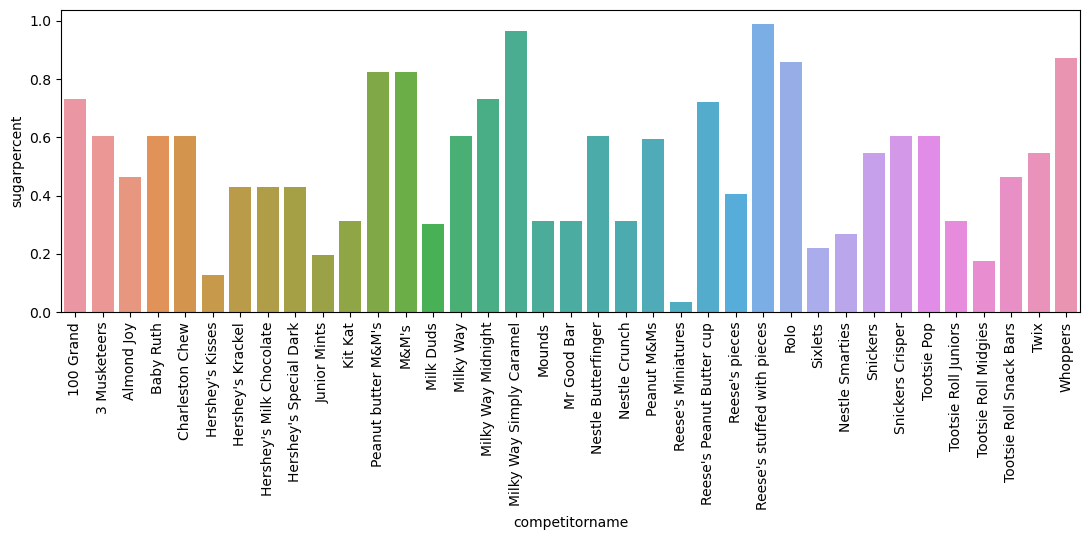

In [120]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=90)

# select all chocolate candies
df_candy_choc = df_candy[df_candy['chocolate']=='Yes']
  
# 1. compare all competitor candies with chocolate for average sugar percent
sns.barplot(x = 'competitorname',
            y = 'sugarpercent',
            data = df_candy_choc)
 
# Show the plot
plt.show()

<AxesSubplot:xlabel='sugarpercent', ylabel='pricepercent'>

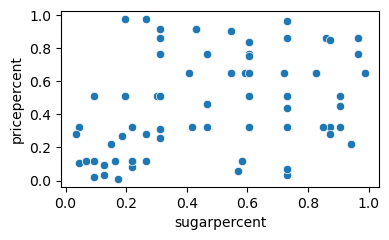

In [124]:
# scatter plot between sugar percent and price percent. Check if there exists any relationship
plt.rcParams["figure.figsize"] = [4, 2.50]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(data=df_candy, x="sugarpercent", y="pricepercent")

# There is no very obvious relationship that is visible.
# It will interesting to analyze data with low sugar percent and dig deeper into price points

<AxesSubplot:xlabel='sugarpercent', ylabel='pricepercent'>

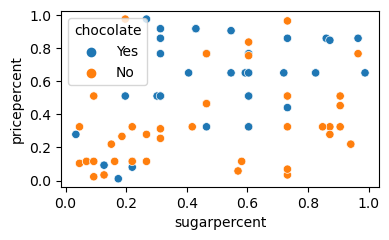

In [127]:
# checking the scatter plot by adding hue on chocolate i.e. if candies contains chocolate (blue)
# and if they don't (orange)
sns.scatterplot(data=df_candy, x="sugarpercent", y="pricepercent", hue="chocolate")

In [135]:
# creating a pie chart
# get average sugar percentage by competitor names
# groupby the data by competitor name
data = df_candy.groupby("competitorname")["sugarpercent"].mean()
data.head()

competitorname
100 Grand       0.732
3 Musketeers    0.604
Air Heads       0.906
Almond Joy      0.465
Baby Ruth       0.604
Name: sugarpercent, dtype: float64

In [139]:
# Get top 10 by mean
data = data.nlargest(n=10)

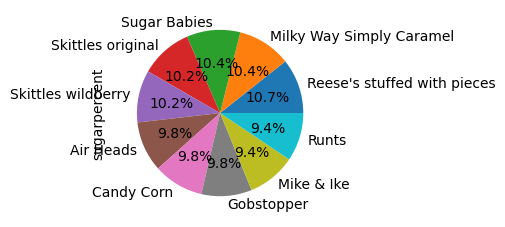

In [142]:
# Plot a pie chart
data.plot.pie(autopct="%.1f%%");

# Clearly Reese's, Caramel candies, Skittles tops the list with sugar content